# Diabetes Health Indicator

* [Fields Description](data\diabetesHI\field.md)

# EDA

* Load the data
    * Check summary statistics and data properties
    * Check if there are missing data
* Visualization
    * Check Distribution of Data in each feature
    * Visualize the relationship of each feature

### Load Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'data\diabetesHI\diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
df.shape

(253680, 22)

### Check Missing Data

In [ ]:
missing_percent = (df.isnull().sum() / len(df))*100
missing_percent

Diabetes_012            0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64

### Unique Category Counts

In [6]:
unique_cat = df.nunique().sort_values(ascending=False)
unique_cat

BMI                     84
PhysHlth                31
MentHlth                31
Age                     13
Income                   8
Education                6
GenHlth                  5
Diabetes_012             3
HighChol                 2
HighBP                   2
Smoker                   2
CholCheck                2
Stroke                   2
HeartDiseaseorAttack     2
NoDocbcCost              2
AnyHealthcare            2
HvyAlcoholConsump        2
Veggies                  2
Fruits                   2
PhysActivity             2
DiffWalk                 2
Sex                      2
dtype: int64

### Category Distribution for each Feature

```python
    dist_df = pd.DataFrame(index=[13.0, 12.0, 11.0, 10.0, 9.0,  8.0, 7.0,  6.0,  5.0,  4.0, 3.0, 2.0, 1.0, 0.0])
    dist_df_num = pd.DataFrame(index=[13.0, 12.0, 11.0, 10.0, 9.0,  8.0, 7.0,  6.0,  5.0,  4.0, 3.0, 2.0, 1.0, 0.0])
    check = ['Age', 'Income', 'Diabetes_012','HighBP', 'HighChol', 'CholCheck','Smoker',
        'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
        'DiffWalk', 'Sex',  'Education']

    for i in check:
        srs = df.value_counts(subset=i, normalize=True)
        srs2 = df.value_counts(subset=i)
        dist_df[i] = pd.DataFrame(srs)['proportion']*100
        dist_df_num[i] = pd.DataFrame(srs2)['count']

    # Normalized (%)
    dist_df.loc['Total'] = dist_df.sum()
    dist_df.fillna('-').T

    # Count
    dist_df_num.loc['Total'] = dist_df_num.sum()
    dist_df_num.fillna('-').T
```

### Dash 01: Check Distribution of Data

In [7]:
from dash import Dash, dcc, html, Input, Output
import dash_bootstrap_components as dbc
from jupyter_dash import JupyterDash
import numpy as np
import plotly.express as px


columns = [i for i in df.columns]


app1 = Dash(__name__, external_stylesheets=[dbc.themes.LUX])

text_style = {'color': 'white', 'fontSize': 14}

app1.layout = html.Div([
    html.P("Select Columns", style=text_style),
    dcc.Dropdown(columns, id='colselector'),

    html.H4('Diabetes Health Indicator', style=text_style),
    dcc.Graph(id="graph"),

])



@app1.callback(
    Output("graph", "figure"), 
    Input("colselector", "value")
    )
def display_color(colselector):
    fig = px.histogram(df, x=colselector)
    return fig

app1.run(jupyter_mode='inline')

### Correlation Matrix

* Using Cramers V statistic to calculate correlation.

In [8]:
import numpy as np
from scipy.stats.contingency import association

def diabetes_correlation(data:pd.DataFrame, target:str) -> pd.DataFrame:
    cols = []
    vals = []
    matrix_dict = {}
    feats = list(data.columns)
    feats.remove(target)
    for i in feats:
        cm = pd.crosstab(df[target], df[i])
        coeff = association(cm.to_numpy(), method='cramer')
        cols.append(i)
        vals.append(coeff)

    matrix_dict['Features'] = cols
    matrix_dict['Coefficient'] = vals
    
    return pd.DataFrame(matrix_dict).reset_index().set_index('Features').sort_values(by=['Coefficient'],ascending=False).drop(['index'], axis=1)


diabetes_correlation(df, 'Diabetes_012')

,Coefficient
Features,
HighBP,0.272191
DiffWalk,0.224425
GenHlth,0.218615
HighChol,0.210671
HeartDiseaseorAttack,0.180281
BMI,0.177810
Age,0.137851
PhysHlth,0.130720
Income,0.124122


# Data Preparation

* Balance Data , Create Splits:
    * As is, imbalanced target labels (Use specific Metrics)
    * Use `make_imbalance` from imblearn to impute to the lowest count of classes.
    * Use SMOTE: Generate Synthetic Data
    * [src](https://towardsdatascience.com/machine-learning-target-feature-label-imbalance-problem-and-solutions-98c5ae89ad0)




### Use Original Dataset (No Resampling)

In [9]:
from sklearn.model_selection import train_test_split

y = df[['Diabetes_012']]
X = df.drop('Diabetes_012', axis=1)

# Stratified, imbalance class frequency
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

### Using `imblearn` to undersample

In [10]:
from imblearn.under_sampling import RandomUnderSampler

randUS = RandomUnderSampler(random_state=42)
X_dws, y_dws = randUS.fit_resample(X,y)

In [11]:
y_dws.value_counts()

Diabetes_012
0.0             4631
1.0             4631
2.0             4631
Name: count, dtype: int64

### Using `imblearn` to upsample: `SMOTE`

In [12]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_ups, y_ups  = sm.fit_resample(X, y)

In [13]:
y_ups.value_counts().to_dict()

{(0.0,): 213703, (1.0,): 213703, (2.0,): 213703}

### Dash 02: Resampled Data Viewer

### Custom Functions for Dash

In [14]:
# VALUE COUNTS / PROPORTIONS TABLE
def value_cunt_table(df:pd.DataFrame, index:list, cols:list, normalize:bool):
    dist_df = pd.DataFrame(index=index)

    for i in cols:
        srs = df.value_counts(subset=i, normalize=normalize)
        if normalize:
            dist_df[i] = pd.DataFrame(srs)['proportion'] * 100
        else:
            dist_df[i] = pd.DataFrame(srs)['count']
    
    dist_df.loc['Total'] = df.sum()
    dist_df = dist_df.round(2)
    return dist_df.fillna('-').T


index = [13.0, 12.0, 11.0, 10.0, 9.0,  8.0, 7.0,  6.0,  5.0,  4.0, 3.0, 2.0, 1.0, 0.0]
cols = ['Age', 'Income', 'Diabetes_012','HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex',  'Education']


dist_table = value_cunt_table(df=df, index=index, cols=cols, normalize=True)

In [15]:
# SAMPLING SELECTION FUNCTION
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

def select_sampler(df:pd.DataFrame, sampler:str) -> pd.DataFrame:
    
    X = df.drop('Diabetes_012', axis=1)
    y = df[['Diabetes_012']]
    
    sampling_list = ['No resampling (Original Data)', 'imblearn: RandomUnderSampler', 'imblearn: SMOTE']

    if sampler == sampling_list[0]:
        return df
    elif sampler == sampling_list[1]:
        ran_down = RandomUnderSampler(random_state=42)
        X_dws, y_dws = ran_down.fit_resample(X,y)
        return pd.merge(left=X_dws, right=y_dws, left_index=True, right_index=True)
    elif sampler == sampling_list[2]:
        smote_ups = SMOTE(random_state=42)
        X_ups, y_ups = smote_ups.fit_resample(X, y)
        return pd.merge(left=X_ups, right=y_ups, left_index=True, right_index=True)
    else:
        raise IndexError("Sampler is not on the pre-defined Sampling List: ['No resampling (Original Data)', 'imblearn: RandomUnderSampler', 'imblearn: SMOTE']")
 
#select_sampler(df=df, sampler='asdfasdf')

### Dash Code

In [16]:
from dash import dash_table
import dash_mantine_components as dmc
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output, State

app2 = Dash(__name__, external_stylesheets=[dbc.themes.LUX])

sampling = ['No resampling (Original Data)', 'imblearn: RandomUnderSampler', 'imblearn: SMOTE']
text_style = {'color': 'white', 'fontSize': 14}

app2.layout = dbc.Container([
    html.H4('Resampling Method', style={'padding':'20px'}),
    dbc.Row([
        dbc.Col(
            dcc.Dropdown(
                id='my-dropdown',
                options=sampling
            ), 
            width=6,  # Adjust the width as needed
            style={'padding':'0 20px'}
        ),
        dbc.Col(
            dbc.Button('Submit', id='submit-button', n_clicks=0, color='primary', class_name='rounded-pill', size='md'),
            width=2,  # Align the button on the right side
            style={'padding': '0 20px', 'text-align': 'right'}
        ),
        dbc.Col(
            [
               dbc.Label("Show as Percentage", style={'margin-right': '10px'}),
               dbc.Switch(id='switch-view', value=False)
            ],
            width='auto'
        )
    ], justify='center', align='center'),

    html.H4('Value Counts/Distribution Table', style={'padding':'20px'}),
    dbc.Row([
        dbc.Col(
            dash_table.DataTable(
                id='output-table',
                columns=[], data=[],
                style_table = {'overflowX': 'auto'},
                style_header = {'textAlign':'center', 'fontWeight':'bold'},
                style_cell={'textAlign': 'left'},
                style_data_conditional=[
                    {
                        'if':{'column_id':'index'}, 
                        'fontWeight':'bold'
                    },
                    {
                        'if':{
                            'filter_query': '{index} = Diabetes_012' 
                        },
                        'backgroundColor': 'lightblue'
                    }

                ]
            ),
            width=12
        )
    ])
], fluid=True)

#################################################
################## CUSTOM #######################
#################################################
def value_cunt_table(df:pd.DataFrame, index:list, cols:list, normalize:bool):
    dist_df = pd.DataFrame(index=index)

    for i in cols:
        srs = df.value_counts(subset=i, normalize=normalize)
        if normalize:
            dist_df[i] = pd.DataFrame(srs)['proportion'] 
        else:
            dist_df[i] = pd.DataFrame(srs)['count']
    
    dist_df.loc['Total'] = dist_df.sum()
    dist_df = dist_df.round(4).fillna('').T.reset_index()

    return dist_df

def select_sampler(df:pd.DataFrame, sampler:str) -> pd.DataFrame:
    
    X = df.drop('Diabetes_012', axis=1)
    y = df[['Diabetes_012']]
    
    sampling_list = ['No resampling (Original Data)', 'imblearn: RandomUnderSampler', 'imblearn: SMOTE']

    if sampler == sampling_list[0]:
        return df
    elif sampler == sampling_list[1]:
        ran_down = RandomUnderSampler(random_state=42)
        X_dws, y_dws = ran_down.fit_resample(X,y)
        return pd.merge(left=X_dws, right=y_dws, left_index=True, right_index=True)
    elif sampler == sampling_list[2]:
        smote_ups = SMOTE(random_state=42)
        X_ups, y_ups = smote_ups.fit_resample(X, y)
        return pd.merge(left=X_ups, right=y_ups, left_index=True, right_index=True)
    else:
        raise IndexError("Sampler is not on the pre-defined Sampling List: ['No resampling (Original Data)', 'imblearn: RandomUnderSampler', 'imblearn: SMOTE']")


##################################################
#### CALLBACKS #### CALLBACKS ##### CALLBACKS#####
##################################################
@app2.callback(
    Output("output-table", "columns"), 
    Output("output-table", "data"), 
    Input("submit-button", "n_clicks"),
    Input("switch-view", 'value'),
    State("my-dropdown", "value")
    )
def update_table(n_clicks, show_as_percentage, selected_option):
    if n_clicks > 0:
        sample_df = select_sampler(df=df, sampler=selected_option)
        index = [13.0, 12.0, 11.0, 10.0, 9.0,  8.0, 7.0,  6.0,  5.0,  4.0, 3.0, 2.0, 1.0, 0.0]
        cols = ['Age', 'Income', 'Diabetes_012','HighBP', 'HighChol', 'CholCheck','Smoker',
            'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
            'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
            'DiffWalk', 'Sex',  'Education']

        if show_as_percentage:
            dist_df = value_cunt_table(df=sample_df, index=index, cols=cols, normalize=True)
            fmt = dash_table.Format.Format(precision=1, scheme=dash_table.Format.Scheme.percentage)
        else:
            dist_df = value_cunt_table(df=sample_df, index=index, cols=cols, normalize=False)
            fmt = dash_table.Format.Format(precision=0, scheme=dash_table.Format.Scheme.fixed)

        data = dist_df.to_dict('records')
        columns = [{'name':str(col), 'id':str(col), 
                    'type':'numeric', 
                    'format':fmt
                    }
                   if col != 'index' else {'name':str(col), 'id':str(col)} # dist_df[col].dtype in ['float64', 'int64'] 
                   for col in dist_df.columns]
        return columns, data
    return [], []


app2.run(jupyter_mode='inline')

# Full Preprocessing Pipeline

### Preprocessing Code - From Sampling to Transformation

In [17]:
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler



df = pd.read_csv(r'data\diabetesHI\diabetes_012_health_indicators_BRFSS2015.csv')


def sampler_pipeline(df:pd.DataFrame, sampler:str) -> pd.DataFrame:
    X = df.drop('Diabetes_012', axis=1)
    y = df[['Diabetes_012']]
    
    sampling_list = ['No resampling (Original Data)', 'imblearn: RandomUnderSampler', 'imblearn: SMOTE']
    if sampler == sampling_list[0]:
        #return df
        return X, y
    elif sampler == sampling_list[1]:
        ran_down = RandomUnderSampler(random_state=42)
        X_dws, y_dws = ran_down.fit_resample(X,y)
        #return pd.merge(left=X_dws, right=y_dws, left_index=True, right_index=True)
        return X_dws, y_dws
    elif sampler == sampling_list[2]:
        smote_ups = SMOTE(random_state=42)
        X_ups, y_ups = smote_ups.fit_resample(X, y)
        #return pd.merge(left=X_ups, right=y_ups, left_index=True, right_index=True)
        return X_ups, y_ups
    else:
        raise IndexError("Sampler is not on the pre-defined Sampling List: ['No resampling (Original Data)', 'imblearn: RandomUnderSampler', 'imblearn: SMOTE']")
    

X, y = sampler_pipeline(df = df, sampler='imblearn: RandomUnderSampler')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [18]:
num_cols = ['BMI', 'MentHlth', 'PhysHlth']
cat_cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']

preprocessing_pipeline = ColumnTransformer(
    transformers = [
                        ('num_features', StandardScaler(), num_cols),
                        ('cat_features', OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
                    ],
    remainder = 'passthrough'
)

preprocessing_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_features', StandardScaler(),
                                 ['BMI', 'MentHlth', 'PhysHlth']),
                                ('cat_features',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['HighBP', 'HighChol', 'CholCheck', 'Smoker',
                                  'Stroke', 'HeartDiseaseorAttack',
                                  'PhysActivity', 'Fruits', 'Veggies',
                                  'HvyAlcoholConsump', 'AnyHealthcare',
                                  'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex',
                                  'Age', 'Education', 'Income'])])

In [19]:
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)

X_train_preprocessed.shape

(11114, 63)

In [20]:
preprocessing_pipeline.get_feature_names_out()

array(['num_features__BMI', 'num_features__MentHlth',
       'num_features__PhysHlth', 'cat_features__HighBP_0.0',
       'cat_features__HighBP_1.0', 'cat_features__HighChol_0.0',
       'cat_features__HighChol_1.0', 'cat_features__CholCheck_0.0',
       'cat_features__CholCheck_1.0', 'cat_features__Smoker_0.0',
       'cat_features__Smoker_1.0', 'cat_features__Stroke_0.0',
       'cat_features__Stroke_1.0',
       'cat_features__HeartDiseaseorAttack_0.0',
       'cat_features__HeartDiseaseorAttack_1.0',
       'cat_features__PhysActivity_0.0', 'cat_features__PhysActivity_1.0',
       'cat_features__Fruits_0.0', 'cat_features__Fruits_1.0',
       'cat_features__Veggies_0.0', 'cat_features__Veggies_1.0',
       'cat_features__HvyAlcoholConsump_0.0',
       'cat_features__HvyAlcoholConsump_1.0',
       'cat_features__AnyHealthcare_0.0',
       'cat_features__AnyHealthcare_1.0', 'cat_features__NoDocbcCost_0.0',
       'cat_features__NoDocbcCost_1.0', 'cat_features__GenHlth_1.0',
       'c

### Dash 03: Preprocessing Pipeline 

```python
import inspect
import importlib
import sklearn.preprocessing as sklp

#################################################
################## CUSTOM #######################
#################################################
def get_preprocessing_options(lib=sklp):
    preprocessing_options = []
    for name, obj in inspect.getmembers(lib):
        if inspect.isclass(obj) or inspect.isfunction(obj):
            if not name.startswith('_'):
                preprocessing_options.append(name)
    return preprocessing_options




#################################################
#################### MAIN #######################
#################################################
preprocessing_options = get_preprocessing_options()

app3 = Dash(__name__, external_stylesheets=[dbc.themes.LUX])

app3.layout = dbc.Container([
    dbc.Row([
        dbc.Col([
            html.H4("Select a Preprocessing Option"),
            dcc.Dropdown(
                id='preprocessing-dropdown',
                options=[{'label':option, 'value':option} for option in preprocessing_options],
                value = None,
                clearable=False

            ),
            html.Br(),
            html.Div(id='selected-option-display')
        ])
    ])
], fluid=True)


##################################################
#### CALLBACKS #### CALLBACKS ##### CALLBACKS#####
##################################################
@app3.callback(
    Output('selected-option-display', 'children'),
    Input('preprocessing-dropdown', 'value'),
    State('preprocessing-dropdown', 'value'),
)

def display_selected_option(selected_option, previous_value):
    if selected_option is None:
        return "Please select a preprocessor"
    try:
        module = importlib.import_module('sklearn.preprocessing')
        preprocessor = getattr(module, selected_option)
        return f"Selected Preprocessor: {preprocessor.__name__}, Type: {type(preprocessor)}"
    except AttributeError:
        return f"Preprocessor '{selected_option}' not found in sklearn.preprocessing."


app3.run(jupyter_mode='inline')
```

# Base Model Selection and Training

### Base Model : `DummyClassifier`

In [21]:
import sklearn

In [22]:
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, StratifiedKFold

dummy_clf = DummyClassifier(strategy='uniform',  random_state=42) 

dummy_pipeline = Pipeline(
    steps= [("Preprocessing Pipeline", preprocessing_pipeline),
            ("Dummy Classifier", dummy_clf),
            ],
    #verbose=True
)

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

folds = StratifiedKFold(n_splits=5)
dummy_scores = cross_validate(
    dummy_pipeline, 
    X_train,
    y_train,
    scoring=scoring,
    cv=folds,
    verbose=1
)

In [23]:
dummy_df = pd.DataFrame(dummy_scores)
dummy_df

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,0.034995,0.031030,0.335583,0.335591,0.335583,0.335512
1,0.021546,0.024001,0.349978,0.350209,0.349978,0.350017
2,0.025006,0.028005,0.337382,0.337589,0.337382,0.337409
3,0.024515,0.026008,0.330184,0.330317,0.330184,0.330178
4,0.028001,0.032521,0.321332,0.321261,0.321326,0.321227


### `LogisticRegression`

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(solver='saga', max_iter=500, random_state=42)

lr_pipeline = Pipeline(
    steps=[("Preprocessing Pipeline", preprocessing_pipeline),
           ("LogisticRegression", lr),
           ],
)

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lr_base = cross_validate(
    lr_pipeline,
    X_train,
    y_train.values.ravel(),
    scoring=scoring,
    cv=folds,
    verbose=1
)

In [25]:
pd.DataFrame(lr_base)

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,1.264589,0.024999,0.528115,0.518430,0.528115,0.519540
1,1.611295,0.013983,0.511471,0.499574,0.511471,0.500128
2,1.527309,0.017004,0.532614,0.524911,0.532614,0.524327
3,1.824677,0.013969,0.513270,0.504452,0.513270,0.504576
4,1.415842,0.014019,0.511251,0.502015,0.511292,0.501873


```python
    # Hyperparameter Tuning
    lr = LogisticRegression(solver='saga', random_state=42)

    lr_pipeline = Pipeline(
        steps=[("Preprocessing Pipeline", preprocessing_pipeline),
            ("LogisticRegression", lr),
            ],
    )
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    param_grid = {'LogisticRegression__penalty': ['l1', 'l2'],
                'LogisticRegression__max_iter': [800, 1200, 1500],
                'LogisticRegression__C': [0.01, 0.1, 1]
                }
    lr_grid_search_cv = GridSearchCV(estimator=lr_pipeline,
                                    param_grid=param_grid,
                                    cv=folds,
                                    scoring=scoring,
                                    refit='accuracy',
                                    error_score='raise')

    lr_grid_search_cv.fit(X_train, y_train.values.ravel())

    def show_results():
        results = pd.DataFrame(lr_grid_search_cv.cv_results_)
        mean_rank = results[['rank_test_recall_macro','rank_test_f1_macro', 'rank_test_accuracy', 'rank_test_precision_macro']].mean(axis=1)
        results['mean_rank'] = mean_rank
        cols = ['mean_rank','param_LogisticRegression__C', 'param_LogisticRegression__max_iter', 'param_LogisticRegression__penalty',
                'mean_test_accuracy','mean_test_precision_macro','mean_test_recall_macro','mean_test_f1_macro']
        results = results[cols]
        return results.sort_values(by='mean_rank', ascending=True)

    show_results().head()

    #lr_grid_search_cv.best_estimator_
```

### Decision Trees

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)

dt_pipeline = Pipeline(
    steps=[("preprocessing", preprocessing_pipeline),
           ("dt", dt_clf),
           ],
)

coring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

dt_base = cross_validate(
    dt_pipeline,
    X_train,
    y_train.values.ravel(),
    scoring=scoring,
    cv=folds,
    verbose=1
)

In [27]:
pd.DataFrame(dt_base)

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,0.157543,0.017520,0.417454,0.415505,0.417454,0.416324
1,0.107511,0.018007,0.429600,0.429767,0.429600,0.429681
2,0.111519,0.013998,0.431849,0.430987,0.431849,0.431363
3,0.098527,0.014002,0.413855,0.415067,0.413855,0.414374
4,0.101462,0.015010,0.428893,0.429308,0.428892,0.429074


### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

rf_pipeline=Pipeline(
    steps=[('preprocessing', preprocessing_pipeline),
           ('rf', rf_clf)],
)

rf_base = cross_validate(
    rf_pipeline,
    X_train,
    y_train.values.ravel(),
    scoring=scoring,
    cv=folds,
    verbose=1
)

pd.DataFrame(rf_base)

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,1.217644,0.056014,0.490328,0.490002,0.490328,0.489840
1,1.184469,0.056528,0.501574,0.494594,0.501574,0.496279
2,1.175246,0.055998,0.479082,0.476056,0.479082,0.476396
3,1.156952,0.054437,0.473234,0.470217,0.473234,0.470017
4,1.167621,0.056373,0.494149,0.491221,0.494174,0.491450


### Gradient Boosting

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=42)

gb_pipeline = Pipeline(
    steps=[('preprocessing', preprocessing_pipeline),
           ('gb', gb_clf)],
)

gb_base = cross_validate(
    estimator=gb_pipeline,
    X=X_train,
    y=y_train.values.ravel(),
    scoring=scoring,
    cv=folds,
    verbose=1
)

pd.DataFrame(gb_base)

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,4.345261,0.023000,0.525866,0.522232,0.525866,0.522843
1,4.385756,0.023000,0.511921,0.506039,0.511921,0.506239
2,4.223190,0.024012,0.520018,0.513442,0.520018,0.513164
3,4.429384,0.022997,0.502924,0.497086,0.502924,0.496896
4,4.237046,0.022011,0.517552,0.511318,0.517596,0.510578


### AdaBoost

In [30]:
from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier(algorithm='SAMME', random_state=42)

ab_pipeline = Pipeline(
    steps=[('preprocessing', preprocessing_pipeline),
           ('ab',ab_clf)]
)

ab_base = cross_validate(
    estimator=ab_pipeline,
    X=X_train,
    y=y_train.values.ravel(),
    scoring=scoring,
    cv=folds,
    verbose=1
)

pd.DataFrame(ab_base)

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,0.505469,0.030996,0.521368,0.509719,0.521368,0.508695
1,0.491508,0.028999,0.502924,0.487052,0.502924,0.485351
2,0.482052,0.029014,0.511921,0.503810,0.511921,0.502733
3,0.472656,0.034014,0.497526,0.486283,0.497526,0.486201
4,0.487495,0.033517,0.513951,0.505739,0.513990,0.506614


### Gaussian Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()

gnb_pipeline = Pipeline(
    steps=[('preprocessing', preprocessing_pipeline),
           ('gnb',gnb_clf)]
)

gnb_base = cross_validate(
    estimator=gnb_pipeline,
    X=X_train,
    y=y_train.values.ravel(),
    scoring=scoring,
    cv=folds,
    verbose=1
)

pd.DataFrame(gnb_base)

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,0.031996,0.018011,0.511021,0.504847,0.511021,0.461358
1,0.030252,0.016969,0.493477,0.482413,0.493477,0.445398
2,0.030002,0.017020,0.494377,0.489638,0.494377,0.439886
3,0.030404,0.018003,0.442645,0.539811,0.442645,0.409035
4,0.033005,0.019002,0.490099,0.475368,0.490214,0.439057


### Stacking Classifier

```python
    from sklearn.ensemble import StackingClassifier

    estimators = [
        ('rf', RandomForestClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('ada', AdaBoostClassifier(algorithm='SAMME', random_state=42))
    ]

    st_clf = StackingClassifier(estimators=estimators)

    st_pipeline = Pipeline(
        steps=[('preprocessing', preprocessing_pipeline),
            ('st',st_clf)]
    )

    st_base = cross_validate(
        estimator=st_pipeline,
        X=X_train,
        y=y_train.values.ravel(),
        scoring=scoring,
        cv=folds,
        verbose=1
    )

    pd.DataFrame(st_base)

# Logger

In [32]:
%load_ext autoreload
%autoreload 2

### Manual Model Configuration

```python
    estimators = [
        ('rf', RandomForestClassifier()),
        ('gb', GradientBoostingClassifier()),
        ('ada', AdaBoostClassifier(algorithm='SAMME'))
    ]

    st_clf = StackingClassifier(estimators=estimators)

    lr = LogisticRegression(solver='saga', max_iter=1000, C=0.01)

    preprocessing_pipeline = ColumnTransformer(
        transformers = [
                            ('num_features', StandardScaler(), num_cols),
                            ('cat_features', OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
                        ],
        remainder = 'passthrough'
    )

    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    folds = StratifiedKFold(n_splits=5, shuffle=True)

```python
    from cust_utils import ModeLogger

    test= ModeLogger.ModeLogger('dhi_model.xlsx')

    test.train(
        X_train=X_train, y_train=y_train, models=gnb_clf, 
        preprocessors=preprocessing_pipeline, folds=folds,
        scoring=scoring
    )

    test.model_stats()
    test.stats_to_excel()
    test.show_rank()

### Logging Hyperparameters - sklearn's `GridSearchCV` and `RandomSearchCV`

```python
# Test
    from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV
    from cust_utils import ModeLogger

    #lr = LogisticRegression()
    gbc = GradientBoostingClassifier()

    preprocessing_pipeline = ColumnTransformer(
        transformers = [
                            ('num_features', StandardScaler(), num_cols),
                            ('cat_features', OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
                        ],
        remainder = 'passthrough'
    )


    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    folds = StratifiedKFold(n_splits=5, shuffle=True)

    param_grid = {
        'model__learning_rate':[0.1, 1, 0.01],
        'model__n_estimators': [200, 400],
        'model__min_samples_split': [2, 4, 6]
    }

    test_searchCV= ModeLogger.ModeLogger('dhi_model.xlsx')

    test_searchCV.train(
    X_train=X_train, y_train=y_train, 
    models=gbc, 
    param_grid=param_grid,
    preprocessors=preprocessing_pipeline, 
    folds=folds,
    scoring=scoring,
    search_cv=GridSearchCV
    )

    test_searchCV.model_stats()
    test_searchCV.stats_to_excel()
    test_searchCV.show_rank()

# AutoML

### Tree-based Pipeline Optimization Tool (TPOT)



```python
import tpot
from tpot import TPOTClassifier

tpot_model = TPOTClassifier(verbosity=2, generations=5, scoring='accuracy')
tpot_model.fit(X_train, y_train.values.ravel())
print(tpot_model.fitted_pipeline_)

tpot_model.export('dhi_tpot_pipeline2.py')
```

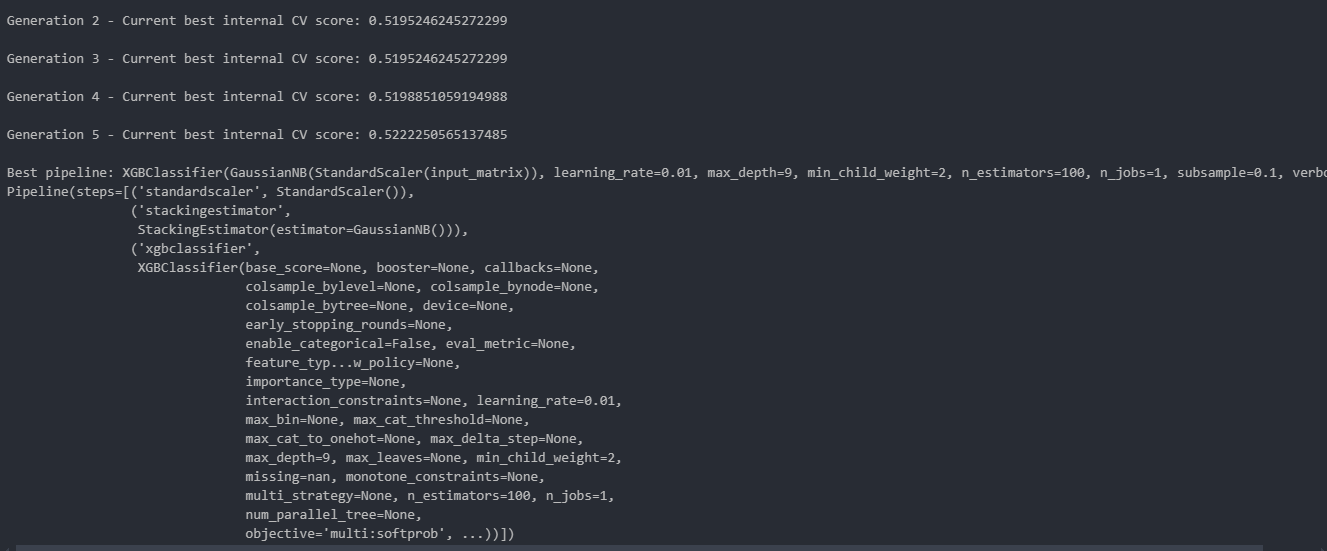

### Hyperopt

```
{'learner': AdaBoostClassifier(learning_rate=0.03674142562278519, n_estimators=345,
                    random_state=np.int64(3)),
 'preprocs': (StandardScaler(with_mean=False, with_std=False),),
 'ex_preprocs': ()}

 {'learner': RandomForestClassifier(bootstrap=False, class_weight='balanced',
                        max_features=0.48592318584966865, min_samples_leaf=4,
                        n_estimators=1738, n_jobs=1, random_state=np.int64(4),
                        verbose=False),
 'preprocs': (StandardScaler(with_mean=False),),
 'ex_preprocs': ()}
```

# Persisting Models w/ MLFlow



In [33]:
from cust_utils import ModeLogger

check = ModeLogger.ModeLogger('dhi_model.xlsx')

In [34]:
check.show_rank().sort_values(by=['Overall Rank'], ascending=True).head(10)

accuracy  precision_macro  \
Model                       Insert D/T                                    
LogisticRegression          10/14/2024 12:57  0.521000         0.512100   
                            10/14/2024 13:27  0.520100         0.509400   
                            10/14/2024 12:56  0.519800         0.510600   
StackingClassifier          10/14/2024 13:30  0.518500         0.512500   
LogisticRegression          10/14/2024 12:58  0.519900         0.508900   
LogisticRegression_searchCV 10/16/2024 12:26  0.519615         0.508843   
                            10/16/2024 12:26  0.519615         0.508843   
                            10/16/2024 12:26  0.519525         0.508735   
                            10/16/2024 12:26  0.519525         0.508735   
                            10/16/2024 12:26  0.518176         0.508387   

                                              recall_macro  f1_macro  \
Model                       Insert D/T                                 
LogisticRegression          10/14/2024 12:57      0.521000  0.511900   
                            10/14/2024 13:27      0.520100  0.508700   
                            10/14/2024 12:56      0.519800  0.510500   
StackingClassifier          10/14/2024 13:30      0.518500  0.512100   
LogisticRegression          10/14/2024 12:58      0.519900  0.508300   
LogisticRegression_searchCV 10/16/2024 12:26      0.519623  0.508156   
                            10/16/2024 12:26      0.519623  0.508156   
                            10/16/2024 12:26      0.519533  0.508051   
                            10/16/2024 12:26      0.519533  0.508051   
                            10/16/2024 12:26      0.518184  0.508559   

                                              Overall Rank  PerModel Rank  
Model                       Insert D/T                                     
LogisticRegression          10/14/2024 12:57          1.50            1.8  
                            10/14/2024 13:27          3.25            2.8  
                            10/14/2024 12:56          3.50            3.0  
StackingClassifier          10/14/2024 13:30          5.00            1.0  
LogisticRegression          10/14/2024 12:58          5.25            3.2  
LogisticRegression_searchCV 10/16/2024 12:26          7.25            3.5  
                            10/16/2024 12:26          7.25            3.5  
                            10/16/2024 12:26          9.25            4.7  
                            10/16/2024 12:26          9.25            4.7  
                            10/16/2024 12:26          9.75            4.3

In [35]:
import mlflow
from mlflow import MlflowClient

client = MlflowClient(tracking_uri="http://127.0.0.1:5000")

In [36]:

# Create Experiment for Diabetes Health Indicator
exp_desc = (
    "Diabetes Health Indicator Classifier Project"
)

exp_tags = {
    "project_name" : "dhi-classifier",
    "mlflow.note.content": exp_desc
}

## Create the experiment
mlflow.set_tracking_uri("http://127.0.0.1:5000")

try:
    dhi_experiment = client.create_experiment(name="DHI_Classifiers", tags=exp_tags)
except Exception as e:
    print(f"Error Occured: {e}")
    dhi_experiment = mlflow.set_experiment("DHI_Classifiers")

Error Occured: RESOURCE_ALREADY_EXISTS: Experiment 'DHI_Classifiers' already exists.


* [Data](#data-preparation)

### LogisticRegression

In [37]:
import ast

c = check._df()
params_string = c[c['Insert D/T']=='10/14/2024 12:57']['Hyperparameters'].values[0]
params = ast.literal_eval(params_string)
params

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 800,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### XGBoost, StackingClassifier Pipeline

In [38]:
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from tpot.builtins import StackingEstimator

### MLFlow and Cross-validation

### MLFlow and Hyperparameter Tuning : `sklearn`'s `BaseSearchCV`

In [45]:
from sklearn.model_selection import GridSearchCV

### MLFlow and Hyperparameter Tuning : `hyperopt`